## ML exsperiment on fitness movments and IMU
The aim is to classify human cycle movements (e.g. "Squats, Biceps) by using an Acceleromter wrist sensor

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
import numpy as np



In [8]:

# Load the CSV dataset
df = pd.read_csv('dataset.csv')
df = df.drop(['mov', 'prob', 'totacc'], axis=1)
df = df.dropna()

df.head()

,timestamp,ax,ay,az,gx,gy,gz,pitch,roll,BAR,status
0,1682170879371,-8.179,-4.225,2.850,1.89,-1.19,0.35,26.002,-70.788,0.005371,0
1,1682170879475,-8.270,-4.306,2.692,0.63,0.00,0.84,26.342,-71.969,0.006592,0
2,1682170879580,-8.112,-4.376,2.881,0.77,-0.14,-0.07,26.944,-70.446,0.018799,0
3,1682170879684,-8.169,-4.321,2.972,0.14,-0.49,0.70,26.428,-70.007,0.036377,0
4,1682170879789,-8.203,-4.323,2.850,-0.84,0.35,1.26,26.465,-70.840,0.045654,0


In [9]:
df.describe()

,timestamp,ax,ay,az,gx,gy,gz,pitch,roll,BAR,status
count,8.910000e+02,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,1.682171e+12,-3.920391,-3.727209,1.591328,-4.396644,12.667329,8.015275,21.930057,-21.760097,-0.277827,0.460157
std,2.747570e+04,6.636165,4.019744,4.243639,125.296975,83.083975,106.997440,23.450128,87.995591,0.163422,0.498690
min,1.682171e+12,-13.027000,-15.455000,-11.568000,-792.050000,-269.850000,-312.830000,-60.776000,-179.980000,-0.546631,0.000000
25%,1.682171e+12,-8.932000,-5.829500,-1.262000,-55.230000,-15.785000,-26.005000,9.789500,-73.614500,-0.393555,0.000000
50%,1.682171e+12,-8.059000,-2.891000,2.572000,-0.350000,2.590000,3.850000,18.221000,-66.703000,-0.316162,0.000000
75%,1.682171e+12,1.653500,-1.624000,3.657000,43.610000,62.265000,32.515000,35.687500,65.215000,-0.189209,1.000000
max,1.682171e+12,11.019000,18.291000,17.014000,1013.600000,261.870000,310.170000,85.679000,179.677000,0.244873,1.000000


In [16]:
from sklearn.preprocessing import StandardScaler

# Select all columns except the last one
cols_to_scale = df.columns[:-1]

# Apply the StandardScaler to the selected columns
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[cols_to_scale]), columns=cols_to_scale)

# Concatenate the scaled columns with the last column (not scaled)
df_scaled = pd.concat([df_scaled, df.iloc[:, -1]], axis=1)

df_scaled.describe()


,timestamp,ax,ay,az,gx,gy,gz,pitch,roll,BAR,status
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,891.000000
mean,-3.592195e-09,1.993666e-17,1.435440e-16,-1.594933e-17,-3.488916e-18,9.968332e-18,-6.977833e-18,-1.116453e-16,6.379733e-17,-1.913920e-16,0.460157
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,0.498690
min,-1.725883e+00,-1.373041e+00,-2.919185e+00,-3.102695e+00,-6.289823e+00,-3.402293e+00,-3.000310e+00,-3.528872e+00,-1.799053e+00,-1.645770e+00,0.000000
25%,-8.648394e-01,-7.556208e-01,-5.232850e-01,-6.727552e-01,-4.059308e-01,-3.426450e-01,-3.181327e-01,-5.180089e-01,-5.896151e-01,-7.085493e-01,0.000000
50%,-2.484768e-03,-6.239950e-01,2.081422e-01,2.312221e-01,3.231456e-02,-1.213590e-01,-3.895060e-02,-1.582567e-01,-5.110273e-01,-2.347073e-01,0.000000
75%,8.649500e-01,8.403982e-01,5.235134e-01,4.870425e-01,3.833581e-01,5.972936e-01,2.291035e-01,5.869976e-01,9.889580e-01,5.425728e-01,1.000000
max,1.733222e+00,2.252473e+00,5.480591e+00,3.636345e+00,8.129234e+00,3.001092e+00,2.825530e+00,2.720017e+00,2.290458e+00,3.200273e+00,1.000000


In [17]:
X = df_scaled.drop('status', axis=1)
y = df_scaled['status']


In [18]:
y.value_counts()

0    481
1    410
Name: status, dtype: int64

In [ ]:
#UNDERSAMPLE
"""
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

print(y_resampled.value_counts)
"""

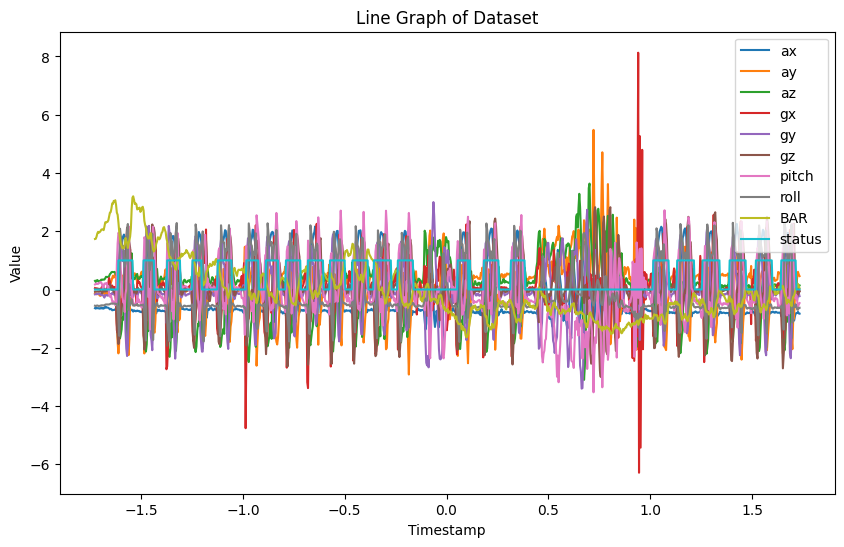

In [19]:
import matplotlib.pyplot as plt

# Set the timestamp column as the index
df_scaled.set_index('timestamp', inplace=True)

# Plot a line graph for each column in the dataset
plt.figure(figsize=(10, 6))
for column in df_scaled.columns:
    if column != 'timestamp':
        plt.plot(df_scaled.index, df_scaled[column], label=column)

# Set the title, axis labels, and legend
plt.title('Line Graph of Dataset')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()

# Display the plot
plt.show()


In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns



# Split the df into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_scaled.drop('status', axis=1), df_scaled['status'], test_size=0.2)

# Define the classification models to use
models = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Support Vector Machine', SVC()),
    ('XGBoost', XGBClassifier()),
    ('Logistic Regression', LogisticRegression())
]

# Train and evaluate each model
results = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    results.append((name, accuracy, precision, recall, f1, cm))

    
    print(f'{name}:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 score: {f1:.4f}')
    print("-_-_-_-_-_-_-_")

# Plot the evaluation results as a bar chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
x = np.arange(len(models))
width = 0.15

fig, ax = plt.subplots(figsize=(10, 6))
for i, metric in enumerate(metrics):
    values = [result[i+1] for result in results]
    rects = ax.bar(x + (i * width), values, width, label=metric)
    
    # Add labels for small values
    for rect in rects:
        height = rect.get_height()
        if height < 0.1:
            ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=8)

ax.set_xticks(x + (2 * width))
ax.set_xticklabels([name for name, _ in models])
ax.legend()

plt.show()

# Print the confusion matrix for each model
for name, _, _, _, _, cm in results:
    print(name)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.show()

Decision Tree:
Accuracy: 0.8946
Precision: 0.9017
Recall: 0.8716
F1 score: 0.8927
-_-_-_-_-_-_-_
Random Forest:
Accuracy: 0.9312
Precision: 0.9297
Recall: 0.9339
F1 score: 0.9264
-_-_-_-_-_-_-_
Naive Bayes:
Accuracy: 0.8553
Precision: 0.8595
Recall: 0.8525
F1 score: 0.8534
-_-_-_-_-_-_-_
Support Vector Machine:
Accuracy: 0.9157
Precision: 0.9190
Recall: 0.9134
F1 score: 0.9148
-_-_-_-_-_-_-_
XGBoost:
Accuracy: 0.9354
Precision: 0.9358
Recall: 0.9352
F1 score: 0.9350
-_-_-_-_-_-_-_
Logistic Regression:
Accuracy: 0.8750
Precision: 0.8788
Recall: 0.8721
F1 score: 0.8734
-_-_-_-_-_-_-_


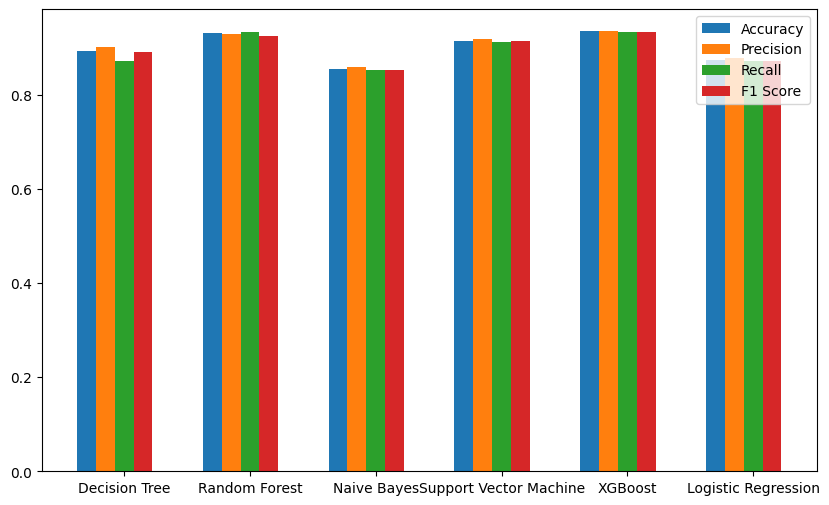

Decision Tree


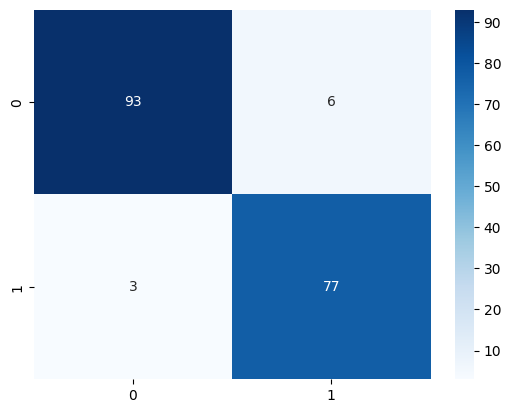

Random Forest


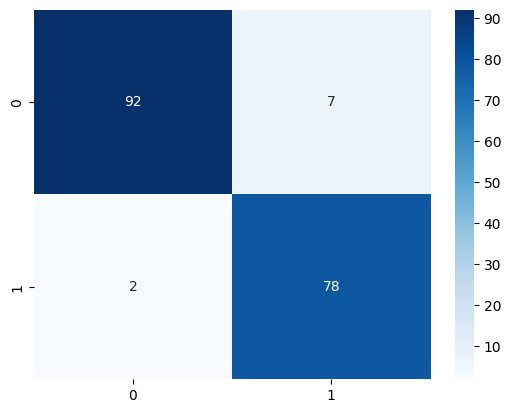

Naive Bayes


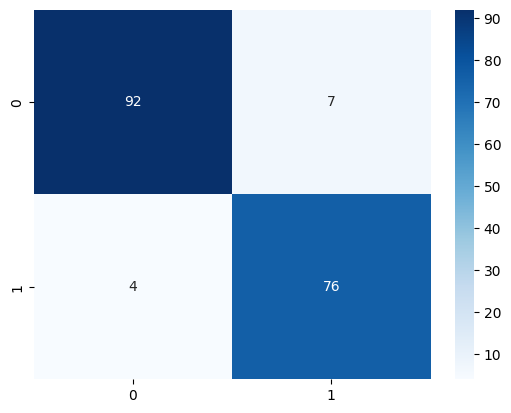

Support Vector Machine


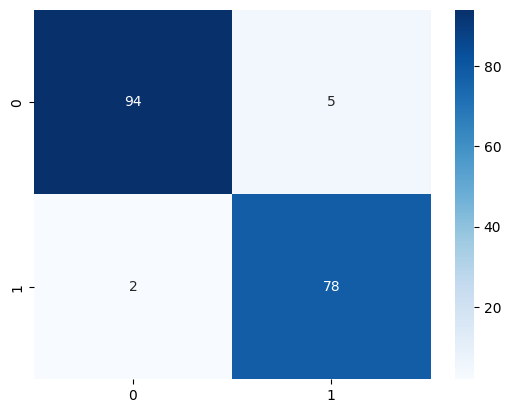

XGBoost


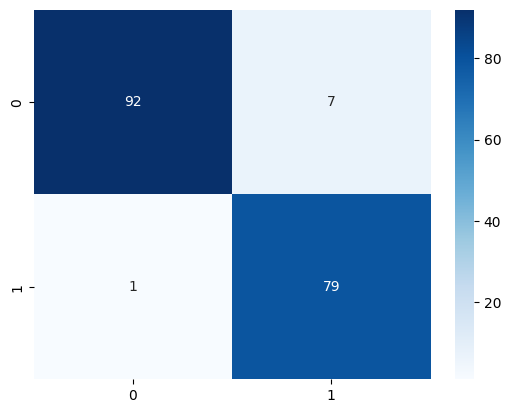

Logistic Regression


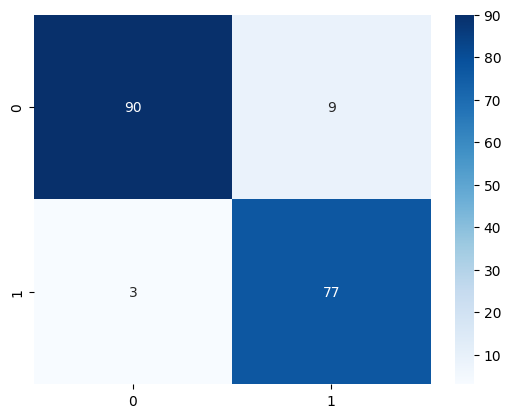

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split
import seaborn as sns

# Split the df into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_scaled.drop('status', axis=1), df_scaled['status'], test_size=0.2)

# Define the classification models to use
models = [    ('Decision Tree', DecisionTreeClassifier()),    ('Random Forest', RandomForestClassifier()),    ('Naive Bayes', GaussianNB()),    ('Support Vector Machine', SVC()),    ('XGBoost', XGBClassifier()),    ('Logistic Regression', LogisticRegression())]

# Train and evaluate each model with cross-validation
results = []
for name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    accuracy = scores.mean()
    precision = cross_val_score(model, X_train, y_train, cv=5, scoring='precision_macro').mean()
    recall = cross_val_score(model, X_train, y_train, cv=5, scoring='recall_macro').mean()
    f1 = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro').mean()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    results.append((name, accuracy, precision, recall, f1, cm))
    
    print(f'{name}:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 score: {f1:.4f}')
    print("-_-_-_-_-_-_-_")

# Plot the evaluation results as a bar chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
x = np.arange(len(models))
width = 0.15

fig, ax = plt.subplots(figsize=(10, 6))
for i, metric in enumerate(metrics):
    values = [result[i+1] for result in results]
    rects = ax.bar(x + (i * width), values, width, label=metric)
    
    # Add labels for small values
    for rect in rects:
        height = rect.get_height()
        if height < 0.1:
            ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=8)

ax.set_xticks(x + (2 * width))
ax.set_xticklabels([name for name, _ in models])
ax.legend()

plt.show()

# Print the confusion matrix for each model
for name, _, _, _, _, cm in results:
    print(name)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.show()


Certamente, si potrebbe classificare i dati dell'accelerometro generati durante lo squat in piedi, squat in discesa e squat accovacciato utilizzando un algoritmo di apprendimento supervisionato standard come SVM, Random Forest o una rete neurale profonda (Deep Neural Network) multiclasse.

Per farlo, dovresti comunque etichettare i tuoi dati con la classe appropriata (squat in piedi, squat in discesa, squat accovacciato) e utilizzare un algoritmo di apprendimento automatico in grado di gestire più classi. 

Un approccio comune per questo tipo di problemi è l'utilizzo di uno schema di classificazione uno contro tutti (one-vs-all), in cui per ognuna delle classi da classificare viene addestrato un modello separatamente, utilizzando i dati di quella classe come positivi e tutti gli altri dati come negativi. In alternativa, potresti utilizzare una rete neurale con più di un output, dove ogni uscita rappresenta una classe.

Per garantire la massima accuratezza nella classificazione dei dati, ti consiglio di raccogliere un insieme di dati rappresentativi, equilibrati e diversificati per ogni classe che intendi classificare, valutare quali funzioni o caratteristiche dell'accelerometro siano maggiormente rilevanti per discriminare tra le diverse fasi di squat e rendere disponibili questi dati al tuo algoritmo di apprendimento automatico.


Here's an example of how you could use the best-performing model from the previous code to make predictions on a new dataset that is not labeled:

In [ ]:
'''
# Load the new dataset
new_data = pd.read_csv('new_data.csv')

# Scale the new data using the same scaler used for the training data
new_data_scaled = pd.DataFrame(scaler.transform(new_data.drop('status', axis=1)), columns=new_data.drop('status', axis=1).columns)

# Make predictions using the best-performing model
y_pred = best_model.predict(new_data_scaled)

# Print the predicted labels
print(y_pred)
'''
